In [241]:
from urllib2 import Request, urlopen
from urlparse import urlparse, urlunparse
import requests, requests_cache
import pandas as pd
import json
from wordcloud import WordCloud
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from bs4 import BeautifulSoup
import re
from os import listdir
from os import chdir
from os.path import isfile, join
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import string
from textblob import TextBlob
import pylab
from __future__ import division

In [274]:
import numpy as np

In [275]:
ind = np.arange(3)

In [3]:
chdir('../sta141bfinal/all/')

In [4]:
def read_text(filename):
    """
    This function reads a txt file with filtered or unfiltered list of titles
    Input: A txt file
    Output: Filtered list of titles
    """
    
    title_names = []
    text_file = open(filename,"r")

    for line in text_file:
        line = line.strip()
        title_names.append(line)

    return title_names

In [5]:
huff = read_text("huffpost.txt")
abc = read_text("abc.txt")
economist = read_text("economist.txt")
fox = read_text("fox.txt")
npr = read_text("npr.txt")
nytimes = read_text("nytimes.txt")
washington = read_text("washington.txt")
wsj = read_text("wsj.txt")
breitbart = read_text("breitbart.txt")

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer().fit_transform(huff)
pairwise_similarity = tfidf * tfidf.T
(pairwise_similarity)

<167x167 sparse matrix of type '<type 'numpy.float64'>'
	with 26789 stored elements in Compressed Sparse Row format>

In [166]:
y = pairwise_similarity.tocoo()
k = y.data.argmax()
maxval = y.data[k]
maxrow = y.row[k]
maxcol = y.col[k]

In [140]:
y.data.sort()

In [168]:

y.nnz

26789

In [188]:
y.data[26788]
maxrow = y.row[26622]
maxcol = y.col[26624]

In [189]:
print maxrow, maxcol

165 165


In [205]:
def noun_polarity(total_list):

    noun_phrases = []
    for title in total_list:
        blob = TextBlob(title)
        noun_phrases.extend(blob.noun_phrases)
    
    noun_polarity = []
    noun_subjectivity = []
    for noun in noun_phrases:
        blob = TextBlob(noun)
        noun_polarity.append(blob.sentiment.polarity)
        noun_subjectivity.append(blob.sentiment.subjectivity)
    
    return noun_polarity, noun_subjectivity


In [206]:
huff_noun_pol, huff_noun_sub = noun_polarity(huff)

In [207]:
abc_noun_pol, abc_noun_sub = noun_polarity(abc)

In [208]:
economist_noun_pol, economist_noun_sub = noun_polarity(economist)

In [209]:
fox_noun_pol, fox_noun_sub = noun_polarity(fox)

In [210]:
npr_noun_pol, npr_noun_sub = noun_polarity(npr)

In [211]:
nytimes_noun_pol, nytimes_noun_sub = noun_polarity(nytimes)

In [212]:
washington_noun_pol, washington_noun_sub = noun_polarity(washington)

In [213]:
wsj_noun_pol, wsj_noun_sub = noun_polarity(wsj)

In [214]:
breitbart_noun_pol, breitbart_noun_sub = noun_polarity(breitbart)

In [246]:
def polarity_levels(total_pol, name, typenews, num):
    pos_pol = [i for i in total_pol if i > 0]
    pos_pol = str(len(pos_pol) / num)
    neg_pol = [i for i in total_pol if i < 0]
    neg_pol = str(len(neg_pol) / num)
    all_pol = [name, neg_pol, pos_pol, typenews]
    
    return all_pol

In [247]:
hp = polarity_levels(huff_noun_pol, "Huffington Post", "Liberal", len(huff))
hp

['Huffington Post', '0.185628742515', '0.173652694611', 'Liberal']

In [248]:
ab = polarity_levels(abc_noun_pol, "ABC News", "Liberal", len(abc))
ab

['ABC News', '0.13698630137', '0.123287671233', 'Liberal']

In [249]:
ec = polarity_levels(economist_noun_pol, "Economist", "Other", len(economist))
fo = polarity_levels(fox_noun_pol, "Fox", "Conservative", len(fox))
np = polarity_levels(npr_noun_pol, "NPR", "Other", len(npr))
ny = polarity_levels(nytimes_noun_pol, "NYTimes", "Liberal", len(nytimes))
wa = polarity_levels(washington_noun_pol, "Washington Post", "Liberal", len(washington))
ws = polarity_levels(wsj_noun_pol, "WSJ", "Other", len(wsj))
br = polarity_levels(breitbart_noun_pol, "Breitbart", "Conservative", len(breitbart))

In [250]:
df = pd.DataFrame([hp, ab, ec, fo, np, ny, wa, ws, br])
df

,0,1,2,3
0,Huffington Post,0.185628742515,0.173652694611,Liberal
1,ABC News,0.13698630137,0.123287671233,Liberal
2,Economist,0.027027027027,0.0810810810811,Other
3,Fox,0.0737179487179,0.0897435897436,Conservative
4,NPR,0.10514541387,0.136465324385,Other
5,NYTimes,0.04375,0.06875,Liberal
6,Washington Post,0.0774647887324,0.147887323944,Liberal
7,WSJ,0.123287671233,0.150684931507,Other
8,Breitbart,0.0727272727273,0.2,Conservative


In [251]:
df_conservative = df[df[3] == "Conservative"]
df_conservative

,0,1,2,3
3,Fox,0.0737179487179,0.0897435897436,Conservative
8,Breitbart,0.0727272727273,0.2,Conservative


In [252]:
df_other = df[df[3] == "Other"]
df_other

,0,1,2,3
2,Economist,0.027027027027,0.0810810810811,Other
4,NPR,0.10514541387,0.136465324385,Other
7,WSJ,0.123287671233,0.150684931507,Other


In [253]:
df_liberal = df[df[3] == "Liberal"]
df_liberal

,0,1,2,3
0,Huffington Post,0.185628742515,0.173652694611,Liberal
1,ABC News,0.13698630137,0.123287671233,Liberal
5,NYTimes,0.04375,0.06875,Liberal
6,Washington Post,0.0774647887324,0.147887323944,Liberal


In [261]:
df_liberal[1]

0     0.185628742515
1      0.13698630137
5            0.04375
6    0.0774647887324
Name: 1, dtype: object

In [267]:
sum(float(item) for item in df_liberal[1])

0.4438298326174

In [268]:
lib1 = sum(float(item) for item in df_liberal[1])
con1 = sum(float(item) for item in df_conservative[1])
oth1 = sum(float(item) for item in df_other[1])

In [269]:
lib2 = sum(float(item) for item in df_liberal[2])
con2 = sum(float(item) for item in df_conservative[2])
oth2 = sum(float(item) for item in df_other[2])
total_other = [oth1, oth2]
total_con = [con1, con2]
total_lib = [lib1, lib2]

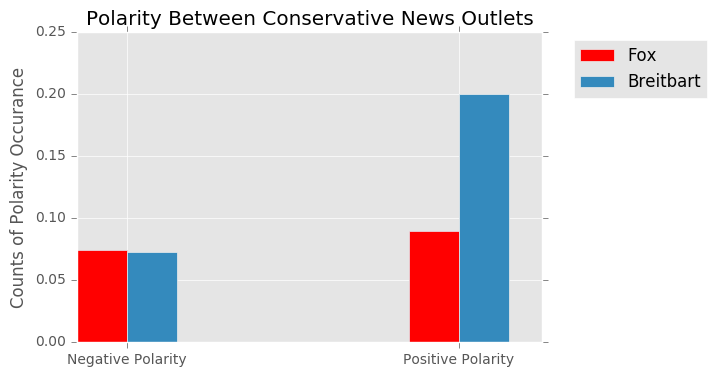

In [285]:
ind = np.arange(2)
width = 0.15
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_conservative.iloc[0, 1:3].values, width, color='b')
rects1 = ax.bar(ind, df_conservative.iloc[0, 1:3].values, width, color='r')

rects2 = ax.bar(ind+width, df_conservative.iloc[1, 1:3].values, width)

ax.set_ylabel('Counts of Polarity Occurance')
ax.set_xticks(ind+width)
ax.set_title("Polarity Between Conservative News Outlets")
ax.set_xticklabels( ('Negative Polarity', 'Positive Polarity') )
ax.legend( (rects1[0], rects2[0]), ('Fox', 'Breitbart'), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

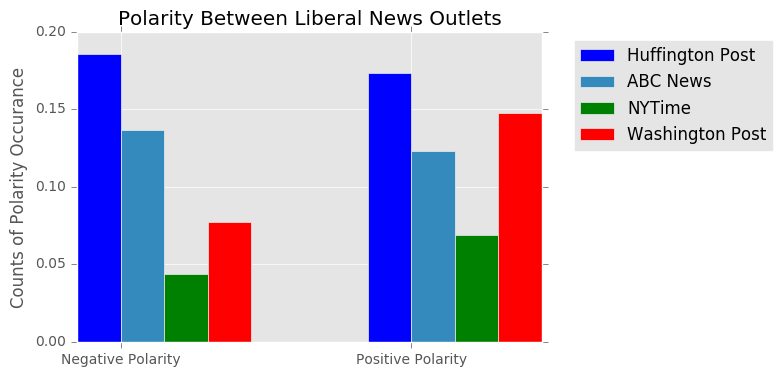

In [279]:

width = 0.15
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_liberal.iloc[0, 1:3].values, width, color='b')


rects2 = ax.bar(ind+width, df_liberal.iloc[1, 1:3].values, width)
rects3 = ax.bar(ind+width+width, df_liberal.iloc[2, 1:3].values, width, color = 'g')

rects4 = ax.bar(ind+width+width+width, df_liberal.iloc[3, 1:3].values, width, color = 'r')

ax.set_ylabel('Counts of Polarity Occurance')
ax.set_xticks(ind+width)
ax.set_title("Polarity Between Liberal News Outlets")
ax.set_xticklabels( ('Negative Polarity',  'Positive Polarity') )
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Huffington Post', 'ABC News', 'NYTime', 'Washington Post'), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

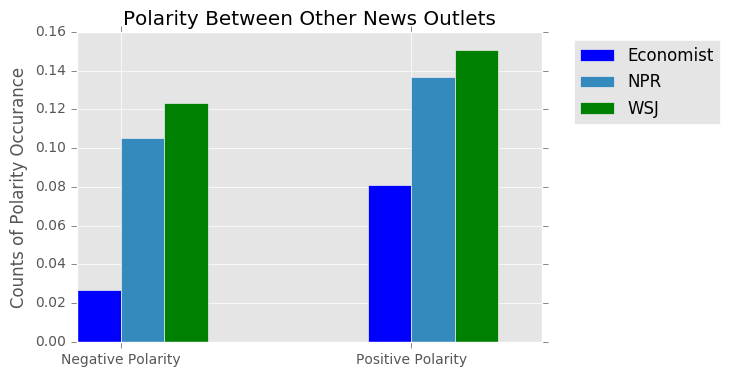

In [280]:
#ind = np.arange(3)
width = 0.15
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, df_other.iloc[0, 1:3].values, width, color='b')

rects2 = ax.bar(ind+width, df_other.iloc[1, 1:3].values, width)
rects3 = ax.bar(ind+width+width, df_other.iloc[2, 1:3].values, width, color = 'g')


ax.set_ylabel('Counts of Polarity Occurance')
ax.set_xticks(ind+width)
ax.set_title("Polarity Between Other News Outlets")
ax.set_xticklabels( ('Negative Polarity', 'Positive Polarity') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Economist', 'NPR', 'WSJ'), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

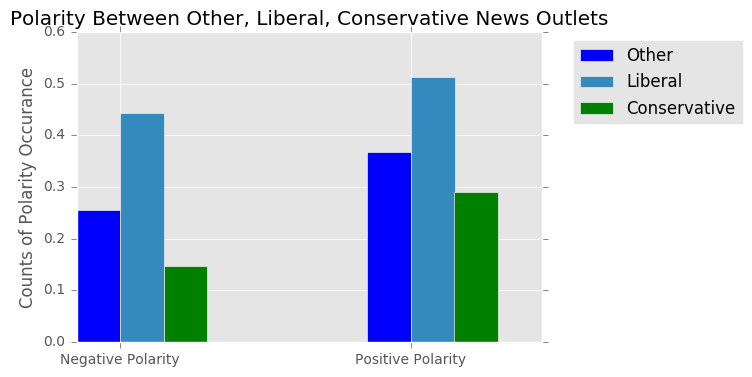

In [281]:
#ind = np.arange(2)
width = 0.15
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, total_other, width, color='b')

rects2 = ax.bar(ind+width, total_lib, width)
rects3 = ax.bar(ind+width+width, total_con, width, color = 'g')


ax.set_ylabel('Counts of Polarity Occurance')
ax.set_xticks(ind+width)
ax.set_title("Polarity Between Other, Liberal, Conservative News Outlets")
ax.set_xticklabels( ('Negative Polarity', 'Positive Polarity') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Other', 'Liberal', 'Conservative'), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()